## k-means in class assignment

you are provided a file with RGB triples for a bunch of colors.  

the problem is that even though there are plenty of RBG-to-color converters on the web
https://www.rapidtables.com/convert/color/rgb-to-hex.html

for example, these two RGB triples look almost identical to the human eye
 - [0, 0, 255]
 - [0, 1, 255]
 
**none of them tell you that "this color is close to blue"**

the task is to use k-means clustering to 
- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked


In [6]:
import pandas
import os
import ast
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline


## read in colors

In [2]:
df_colors = pandas.read_csv("colors.csv")

df_colors['top_color'] = df_colors['top_color'].apply(ast.literal_eval)
df_colors['rgb'] = df_colors.top_color.apply(lambda x: np.array([x['red'], x['green'], x['blue']]))
df_colors['red'] = df_colors.top_color.apply(lambda x: x['red'])
df_colors['green'] = df_colors.top_color.apply(lambda x: x['green'])
df_colors['blue'] = df_colors.top_color.apply(lambda x: x['blue'])

df_colors

,colors,hymnal_id,image,top_color,rgb,red,green,blue
0,"[{'color': {'red': 233, 'green': 197, 'blue': ...",48720,mobile_background_image,"{'red': 233, 'green': 197, 'blue': 146, 'alpha...","[233, 197, 146]",233,197,146
1,"[{'color': {'red': 183, 'green': 97, 'blue': 5...",48720,desktop_background_image,"{'red': 183, 'green': 97, 'blue': 58, 'alpha':...","[183, 97, 58]",183,97,58
2,"[{'color': {'red': 188, 'green': 84, 'blue': 7...",48720,video_thumbnail,"{'red': 188, 'green': 84, 'blue': 7, 'alpha': ...","[188, 84, 7]",188,84,7
3,"[{'color': {'red': 247, 'green': 252, 'blue': ...",48546,mobile_background_image,"{'red': 247, 'green': 252, 'blue': 254, 'alpha...","[247, 252, 254]",247,252,254
4,"[{'color': {'red': 248, 'green': 253, 'blue': ...",48546,desktop_background_image,"{'red': 248, 'green': 253, 'blue': 253, 'alpha...","[248, 253, 253]",248,253,253
...,...,...,...,...,...,...,...,...
2025,"[{'color': {'red': 27, 'green': 123, 'blue': 1...",45943,video_thumbnail,"{'red': 27, 'green': 123, 'blue': 141, 'alpha'...","[27, 123, 141]",27,123,141
2026,"[{'color': {'red': 194, 'green': 193, 'blue': ...",48604,video_thumbnail,"{'red': 194, 'green': 193, 'blue': 198, 'alpha...","[194, 193, 198]",194,193,198
2027,"[{'color': {'red': 41, 'green': 113, 'blue': 1...",45942,mobile_background_image,"{'red': 41, 'green': 113, 'blue': 197, 'alpha'...","[41, 113, 197]",41,113,197
2028,"[{'color': {'red': 35, 'green': 114, 'blue': 1...",45942,desktop_background_image,"{'red': 35, 'green': 114, 'blue': 197, 'alpha'...","[35, 114, 197]",35,114,197


## visualize some colors 

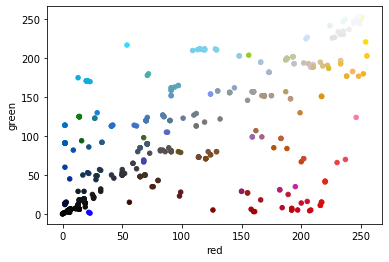

In [3]:
# get first X colors
n = 500
colors = df_colors.rgb[:n]/256
df_colors[:n].reset_index(drop=False).plot(x='red', y='green', kind='scatter', color=colors )


## prepare dataset for sklearn

In [4]:
use_cols = ['red', 'green', 'blue']
X = np.array(df_colors[use_cols].values)
X

array([[233, 197, 146],
       [183,  97,  58],
       [188,  84,   7],
       ...,
       [ 41, 113, 197],
       [ 35, 114, 197],
       [ 27, 123, 141]])

## use k-means for clustering

In [5]:
n_clusters = 10
random_state = 10

In [7]:
## get instance of model
model = KMeans(10)

## fit model 
model.fit(X)

## predict cluster
df_colors['cluster'] = model.predict(X)



## make a histogram of your color clusters to see the dsitribution of colors


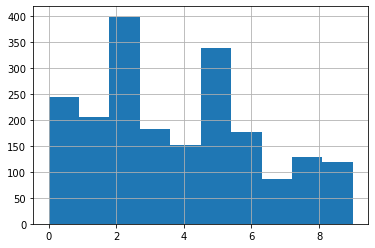

In [8]:
# get distribution of clusters
df_colors.cluster.hist()


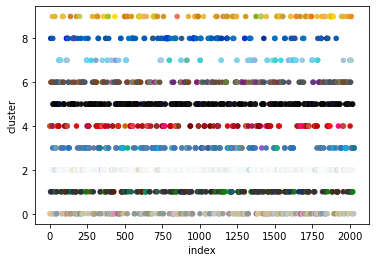

In [9]:
# take a look at distribution of colors
colors = df_colors.rgb/256
df_colors.reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors)

## establish some human-readable names for your clusters like red, blue, yellow, etc.


In [ ]:
# name your clusters



## determine the centroids of the clusters



In [ ]:
# get the centroids
model.cluster_centers_




## write a function that makes the best guess of an RGB triple based on the centroids


In [ ]:
# determine color of individual RGB triple based on distance from centroid



## make some visual output to show that your guesses worked


In [ ]:
## do something clever
def guess_color(triple)
    model.predict(triple) >>> 6

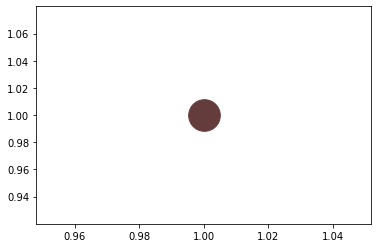

In [26]:
import matplotlib.pyplot as plt
c = [[100/256,60/256,60/256]]

x=[1]
y = [1]

plt.scatter(x,y,c=c , s=1000)